In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import pathlib
import glob
import os 
import seaborn as sns
import scipy
import rpy2
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import celltypist
from celltypist import models
import scarches as sca
import urllib.request
import matplotlib as mpl
import matplotlib.pyplot as plt

2024-07-25 18:58:21.692229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
In order to use sagenet models, please install pytorch geometric (see https://pytorch-geometric.readthedocs.io) and 
 captum (see https://github.com/pytorch/captum).
multigrate is not installed. To use multigrate models, please install it first using "pip install multigrate".


In [3]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400)
sc.settings.figdir = '/project/data/gew123/Cell_Annotation/Figures'

In [4]:
# Read in annotated object
adata = sc.read_h5ad('/project/data/gew123/Cell_Annotation/FINAL_ATLAS_OBJECTS/final_atlas_annotated.h5ad')

In [5]:
adata.obs

,Source,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,outlier,leiden_res0.9,annotations_final
AAACCTGAGCAATATG_1,Jansky,1165,7.061334,1706.0,7.442493,19.460727,0.0,0.000000,0.000000,39.0,3.688879,2.286049,0.0,0.000000,0.000000,False,15,Neuroblasts
AAACCTGAGCGCTTAT_1,Jansky,901,6.804615,1225.0,7.111512,17.142857,2.0,1.098612,0.163265,53.0,3.988984,4.326531,0.0,0.000000,0.000000,False,15,Neuroblasts
AAACCTGAGGCACATG_1,Jansky,1414,7.254885,2027.0,7.614805,13.616182,2.0,1.098612,0.098668,52.0,3.970292,2.565368,0.0,0.000000,0.000000,False,15,Neuroblasts
AAACCTGAGTGGCACA_1,Jansky,1051,6.958448,1392.0,7.239215,14.224138,2.0,1.098612,0.143678,50.0,3.931826,3.591954,0.0,0.000000,0.000000,False,15,Neuroblasts
AAACCTGAGTTCGCAT_1,Jansky,958,6.865891,1364.0,7.218910,18.035191,5.0,1.791759,0.366569,46.0,3.850148,3.372434,1.0,0.693147,0.073314,False,15,Neuroblasts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J15-39,Wienke,2091,7.645876,5550.4,8.621805,15.840300,357.0,5.880533,6.431969,591.3,6.384013,10.653286,0.0,0.000000,0.000000,False,2,Cytotoxic (CD8+) T cells
N4-39,Wienke,1602,7.379632,3382.8,8.126755,14.213078,216.9,5.384036,6.411848,382.1,5.948296,11.295377,0.0,0.000000,0.000000,False,8,Cytotoxic (CD8+) T cells
N18-39,Wienke,2194,7.693937,4917.2,8.500698,11.392662,178.3,5.189060,3.626047,417.0,6.035481,8.480436,1.0,0.693147,0.020337,False,11,Naïve T cells
O14-39,Wienke,2260,7.723562,5545.8,8.620976,14.544340,333.3,5.812039,6.009953,474.2,6.163736,8.550615,0.0,0.000000,0.000000,False,11,Cytotoxic (CD8+) T cells


# Plot cell distribution by dataset

In [6]:
# Plot by cell type

# Create a DataFrame from the obs column
df = adata.obs[['Source', 'annotations_final']]

# Create a contingency table
contingency_table = pd.crosstab(df['Source'], df['annotations_final'])

# Convert to a long format for seaborn
long_df = contingency_table.reset_index().melt(id_vars='Source', var_name='annotations_final', value_name='Count')

In [26]:
contingency_table

manual_labels_final,B cells,Cytotoxic (CD8+) T cells,Cytotoxic (CD8+/IGKC+) T cells,Helper (CD4+) T cells,Macrophages/monocytes,Mast cells,NK cells,Naïve T cells,Plasma cells,Proliferating T cells,...,Sympathetic neurons,Neuroblasts,Mesenchymal cells,Chromaffin cells,Endothelial cells,Bridge cells,Myofibroblasts,SCPs,Hepatocytes,Adrenal cortex
Source,,,,,,,,,,,,,,,,,,,,,
Jansky,200,525,0,3,57,0,17,72,69,94,...,2509,36317,1201,7686,479,11150,71,256,580,214
Kildesiute,1116,4347,21,52,2459,58,1024,676,173,262,...,60,2117,3715,886,833,8,638,695,0,13
Slyper,20,292,1,0,60,0,24,159,36,1,...,50,9170,2710,3,3309,25,20,1199,0,1454
Verhoeven,3998,7800,3744,4628,7872,132,3296,12299,606,5466,...,301,6768,1447,3862,2625,13,3989,638,0,38
Wienke,3,158,0,0,41,0,6,60,5,47,...,2,78,29,163,124,1,72,57,0,0
Yuan,70,299,64,30,787,8,139,490,23,55,...,10,42,393,351,88,2,31,10,1,3


In [8]:
colors = (plt.rcParams["axes.prop_cycle"])
color_list = colors.by_key()["color"]
cell_order = sorted(adata.obs.annotations_final.unique())

# Cell ids
nb = cell_order.index('Neuroblasts')
chrom = cell_order.index('Chromaffin cells')
scps = cell_order.index('SCPs')
mast = cell_order.index('Mast cells')
fibro = cell_order.index('Myofibroblasts')
tcyto = cell_order.index('Cytotoxic (CD8+) T cells')
tprolif = cell_order.index('Proliferating T cells')
bcell = cell_order.index('B cells')
prog = cell_order.index('Connecting progenitor cells')
latenb = cell_order.index('Late neuroblasts')
plasma = cell_order.index('Plasma cells')
nk = cell_order.index('NK cells')
helper = cell_order.index('Helper (CD4+) T cells')
bridge = cell_order.index('Bridge cells')

# Swapping colors
color_list[mast], color_list[tcyto] = color_list[tcyto], color_list[mast]
color_list[tprolif], color_list[fibro] = color_list[fibro], color_list[tprolif]
color_list[bcell], color_list[nb] = color_list[nb], color_list[bcell]
color_list[latenb], color_list[prog] = color_list[prog], color_list[latenb]
color_list[nb], color_list[latenb] = color_list[latenb], color_list[nb]
color_list[nb], color_list[prog] = color_list[prog], color_list[nb]
color_list[prog], color_list[latenb] = color_list[latenb], color_list[prog]
color_list[nb], color_list[plasma] = color_list[plasma], color_list[nb]
color_list[nk], color_list[prog] = color_list[prog], color_list[nk]
color_list[helper], color_list[plasma] = color_list[plasma], color_list[helper]
color_list[scps], color_list[plasma] = color_list[plasma], color_list[scps]
color_list[nb], color_list[latenb] = color_list[latenb], color_list[nb]
color_list[helper], color_list[latenb] = color_list[latenb], color_list[helper]
color_list[nb], color_list[latenb] = color_list[latenb], color_list[nb]
color_list[nb], color_list[tcyto] = color_list[tcyto], color_list[nb]
color_list[nk], color_list[bcell] = color_list[bcell], color_list[nk]

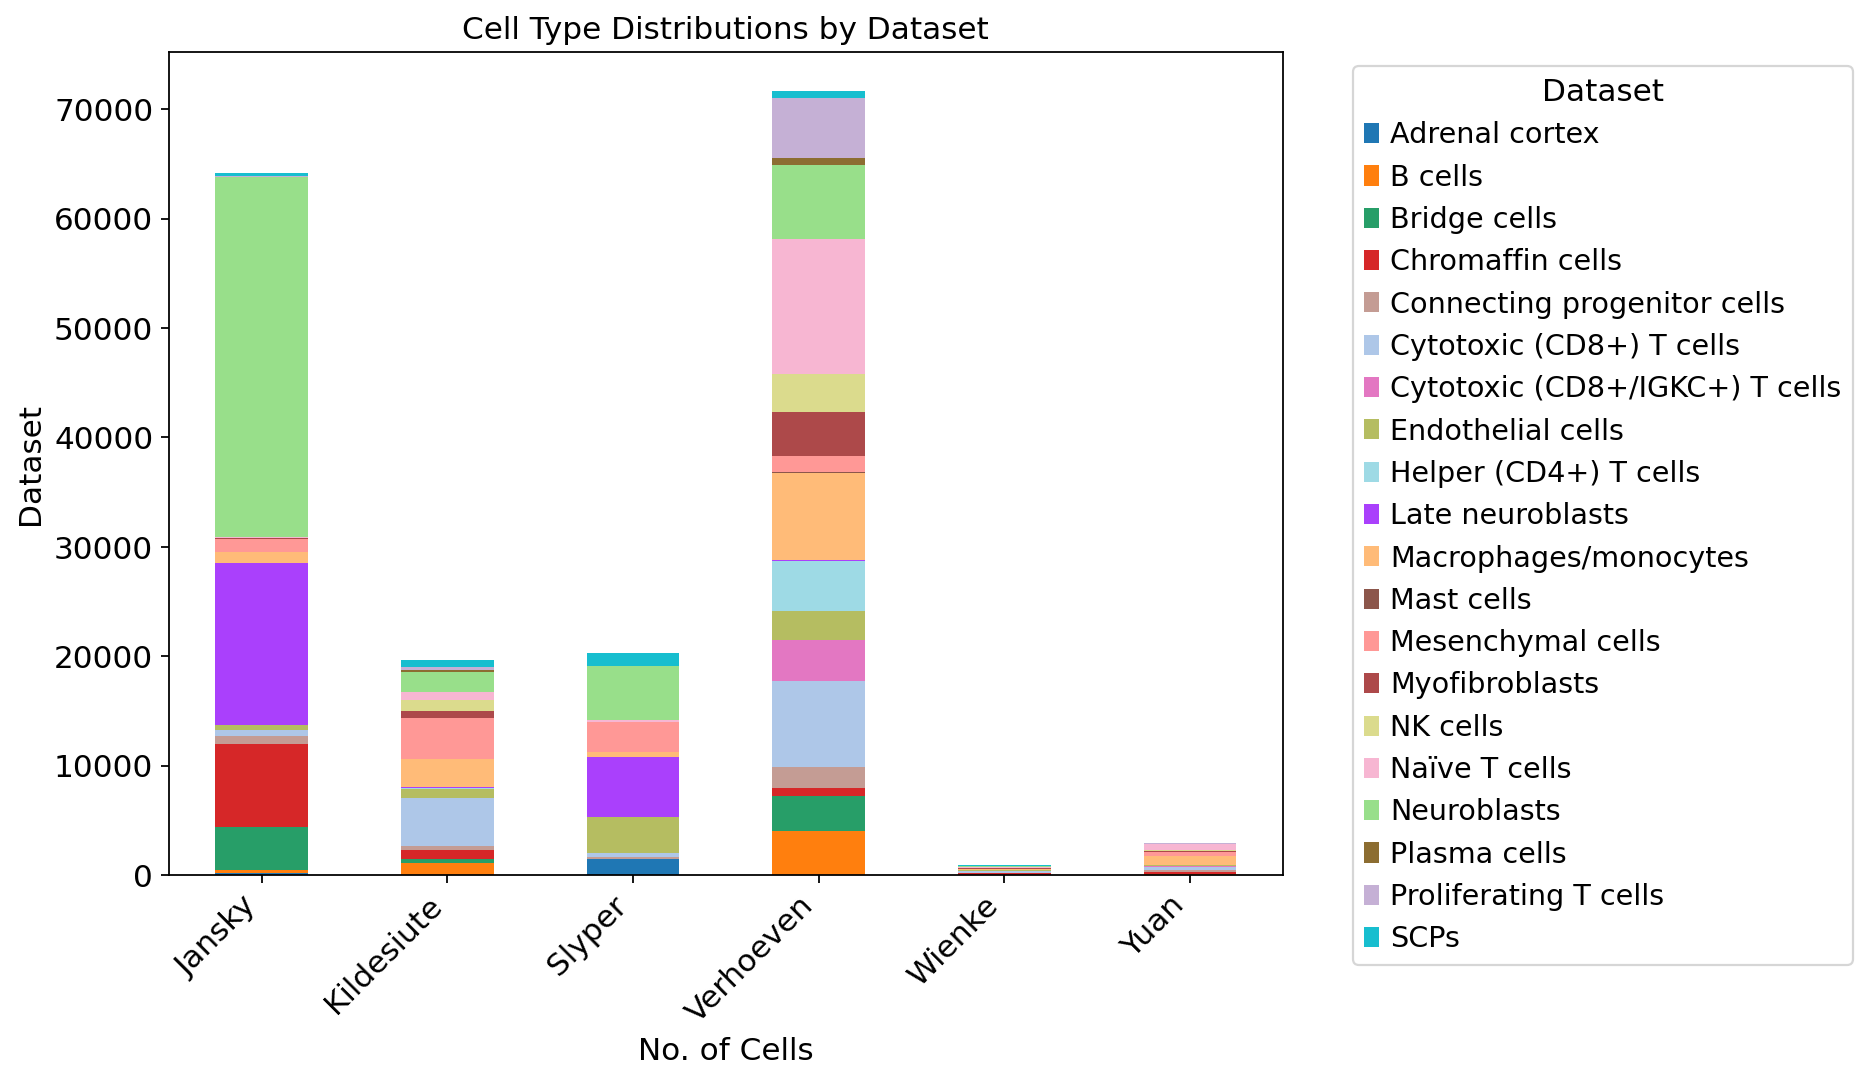

In [10]:
# Plot
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 7), color=color_list)

# Customize the plot
ax.set_title('Cell Type Distributions by Dataset')
ax.set_xlabel('No. of Cells')
ax.set_ylabel('Dataset')
ax.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(False)
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.tight_layout()
plt.savefig('/project/data/gew123/Cell_Annotation/Final_figures/atlas/celltype_distribution_datasets.png')
plt.show()

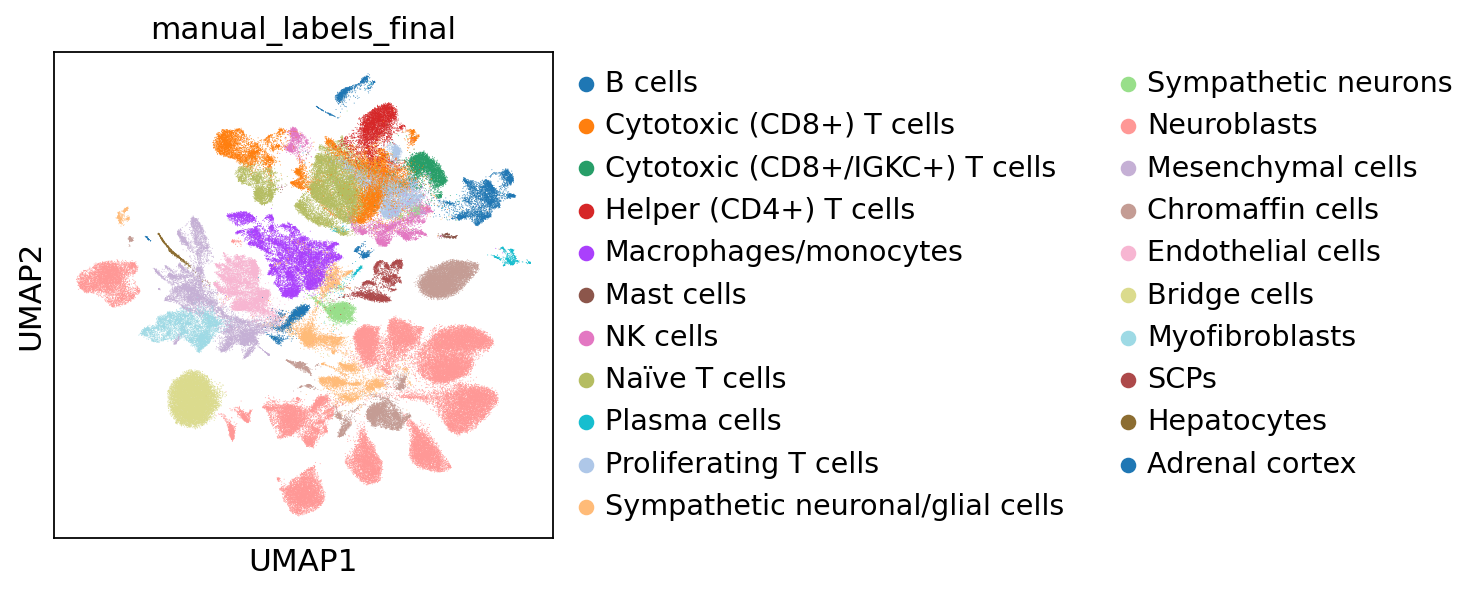

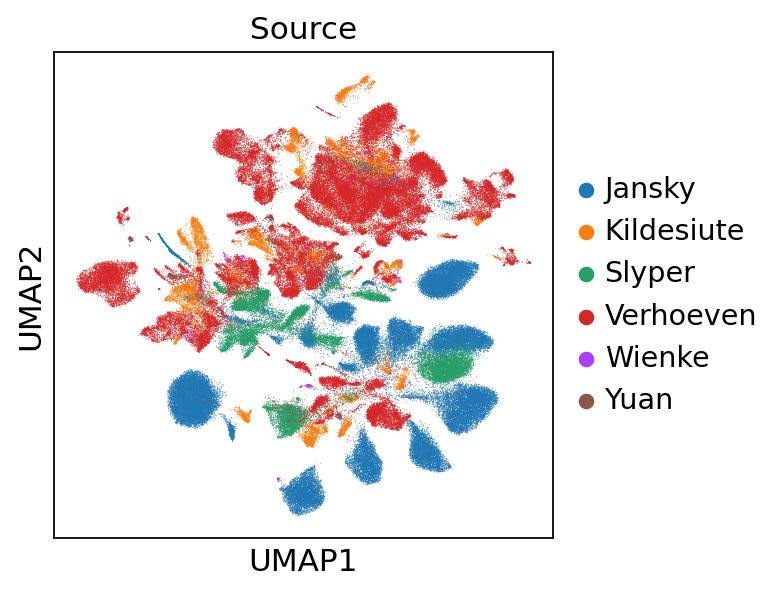

In [23]:
# Confirm color distribution matches umap
sc.pl.umap(adata, color='manual_labels_final')
sc.pl.umap(adata, color='Source')

In [11]:
# Plot immune vs other cell types
immune_types = ['B cells', 'Cytotoxic (CD8+) T cells', 'Cytotoxic (CD8+/IGKC+) T cells', 'Helper (CD4+) T cells',
       'Mast cells', 'NK cells', 'Naïve T cells', 'Proliferating T cells', 'Plasma cells',
       'Macrophages/monocytes']

other_types = [cell for cell in contingency_table.columns if cell not in immune_types]

In [13]:
def categorize_celltype(cell_type):
    if cell_type in other_types:
        return 'Other'
    elif cell_type in immune_types:
        return 'Immune'
    else:
        return 'Other'

# Assuming 'manual_labels' column contains the cell types
adata.obs['Type'] = adata.obs['annotations_final'].apply(categorize_celltype)

In [14]:
adata.obs

,Source,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,outlier,leiden_res0.9,annotations_final,Type
AAACCTGAGCAATATG_1,Jansky,1165,7.061334,1706.0,7.442493,19.460727,0.0,0.000000,0.000000,39.0,3.688879,2.286049,0.0,0.000000,0.000000,False,15,Neuroblasts,Other
AAACCTGAGCGCTTAT_1,Jansky,901,6.804615,1225.0,7.111512,17.142857,2.0,1.098612,0.163265,53.0,3.988984,4.326531,0.0,0.000000,0.000000,False,15,Neuroblasts,Other
AAACCTGAGGCACATG_1,Jansky,1414,7.254885,2027.0,7.614805,13.616182,2.0,1.098612,0.098668,52.0,3.970292,2.565368,0.0,0.000000,0.000000,False,15,Neuroblasts,Other
AAACCTGAGTGGCACA_1,Jansky,1051,6.958448,1392.0,7.239215,14.224138,2.0,1.098612,0.143678,50.0,3.931826,3.591954,0.0,0.000000,0.000000,False,15,Neuroblasts,Other
AAACCTGAGTTCGCAT_1,Jansky,958,6.865891,1364.0,7.218910,18.035191,5.0,1.791759,0.366569,46.0,3.850148,3.372434,1.0,0.693147,0.073314,False,15,Neuroblasts,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J15-39,Wienke,2091,7.645876,5550.4,8.621805,15.840300,357.0,5.880533,6.431969,591.3,6.384013,10.653286,0.0,0.000000,0.000000,False,2,Cytotoxic (CD8+) T cells,Immune
N4-39,Wienke,1602,7.379632,3382.8,8.126755,14.213078,216.9,5.384036,6.411848,382.1,5.948296,11.295377,0.0,0.000000,0.000000,False,8,Cytotoxic (CD8+) T cells,Immune
N18-39,Wienke,2194,7.693937,4917.2,8.500698,11.392662,178.3,5.189060,3.626047,417.0,6.035481,8.480436,1.0,0.693147,0.020337,False,11,Naïve T cells,Immune
O14-39,Wienke,2260,7.723562,5545.8,8.620976,14.544340,333.3,5.812039,6.009953,474.2,6.163736,8.550615,0.0,0.000000,0.000000,False,11,Cytotoxic (CD8+) T cells,Immune


In [15]:
# Generate new contingency table
# Create a contingency table
df = adata.obs[['Source', 'Type']]

contingency_table2 = pd.crosstab(df['Source'], df['Type'])

# Convert to a long format for seaborn
long_df = contingency_table2.reset_index().melt(id_vars='Source', var_name='Type', value_name='Count')

In [16]:
contingency_table2

Type,Immune,Other
Source,,
Jansky,2015,62164
Kildesiute,10338,9343
Slyper,1002,19309
Verhoeven,50226,21420
Wienke,322,564
Yuan,1995,935


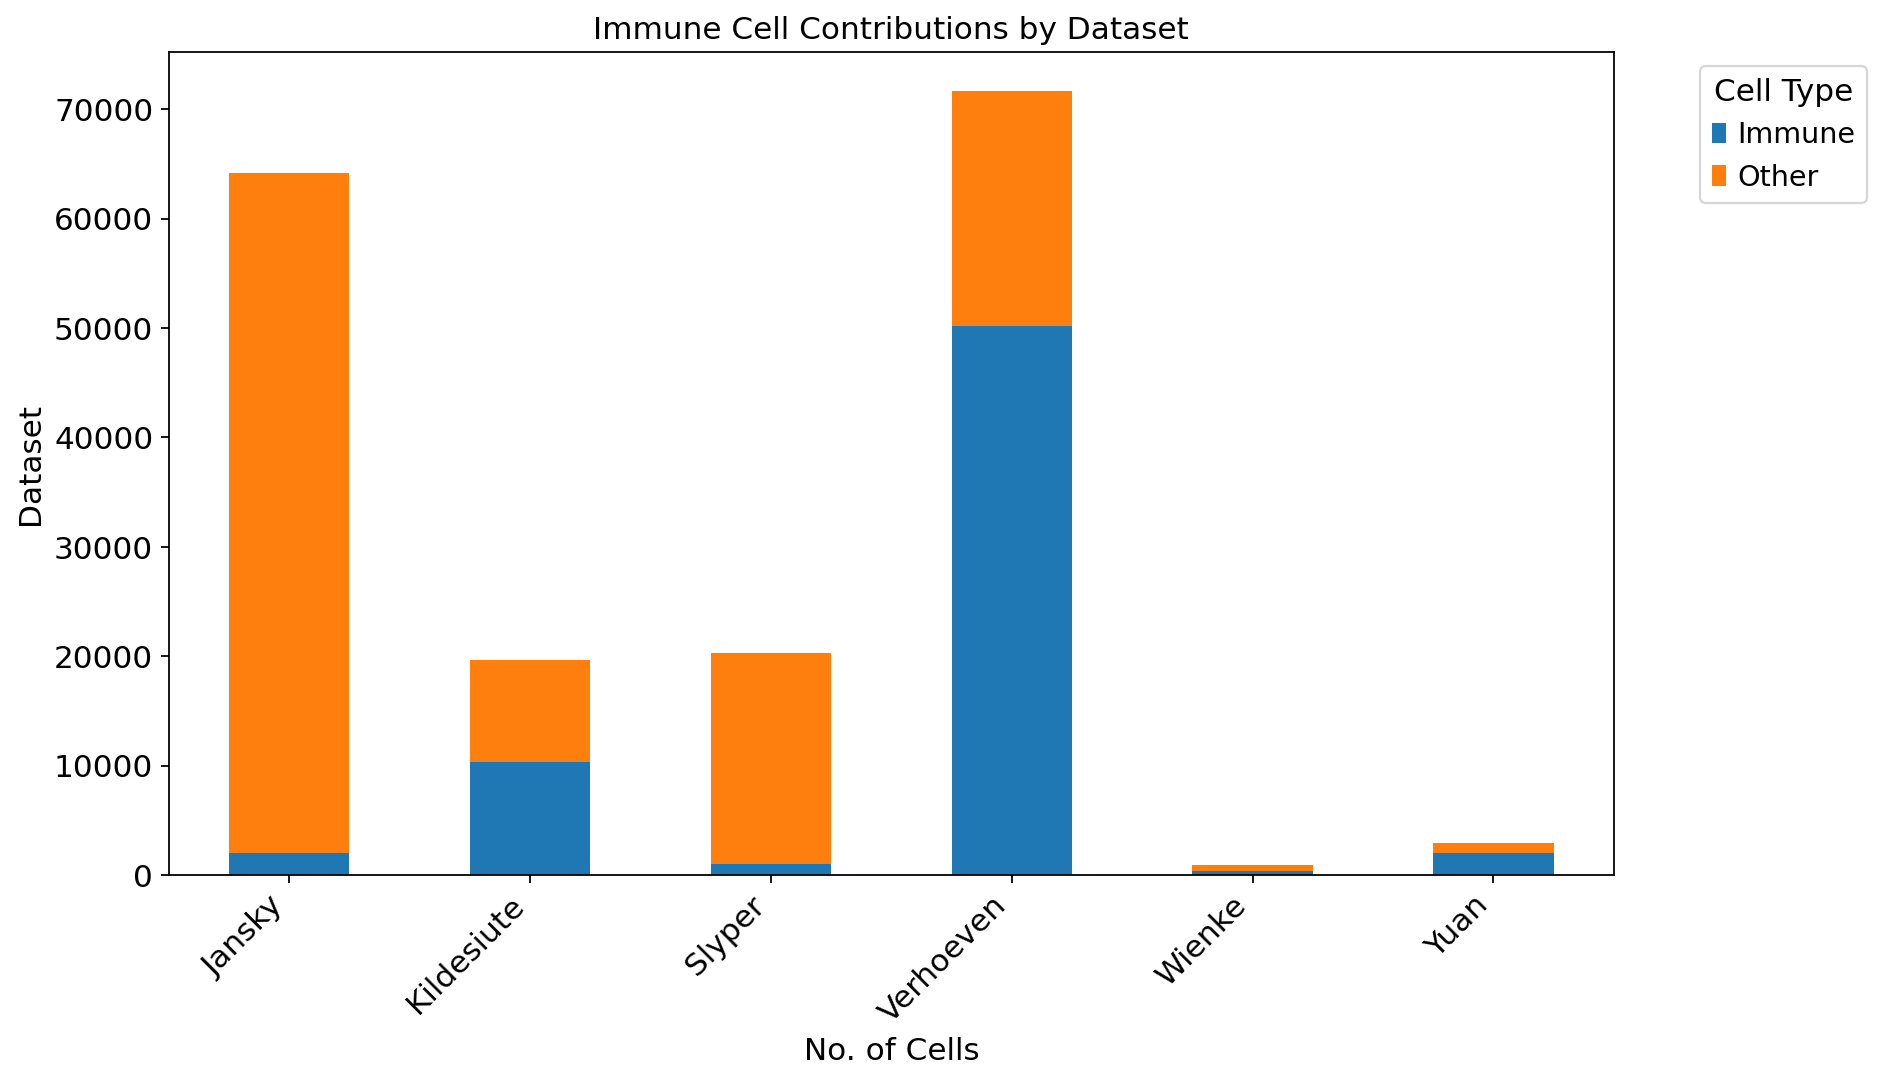

In [18]:
# Plot
ax = contingency_table2.plot(kind='bar', stacked=True, figsize=(12, 7), color=color_list)

# Customize the plot
ax.set_title('Immune Cell Contributions by Dataset')
ax.set_xlabel('No. of Cells')
ax.set_ylabel('Dataset')
ax.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(False)
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.tight_layout()
plt.savefig('/project/data/gew123/Cell_Annotation/Final_figures/atlas/celltype_categories_datasets.png')
plt.show()

# Plot immune cell type counts

In [19]:
# Get colors

all_cells = list(contingency_table.columns)

indices = [i for i, value in enumerate(all_cells) if value in immune_types]
indices

[1, 5, 6, 8, 10, 11, 14, 15, 17, 18]

In [20]:
# Define broad cell groups
myeloid = ['Macrophages/monocytes', 'Mast cells']
t_cell = ['Cytotoxic (CD8+) T cells', 'Cytotoxic (CD8+/IGKC+) T cells', 'Helper (CD4+) T cells', 'NK cells',
         'Naïve T cells', 'Proliferating T cells']
b_cell = ['B cells', 'Plasma cells']

cell_groups = {'Myeloid cells': myeloid, 'T cells': t_cell, 'B cells': b_cell}

sorted_cell_types = myeloid + t_cell + b_cell

In [24]:
# Calculate cell group counts
def calculate_category_counts(cell_counts, categories):
    category_counts = {}
    for category_name, cell_types in categories.items():
        category_counts[category_name] = cell_counts[cell_types].sum()
    return pd.Series(category_counts)

cell_group_counts = calculate_category_counts(immune_cell_counts, cell_groups)

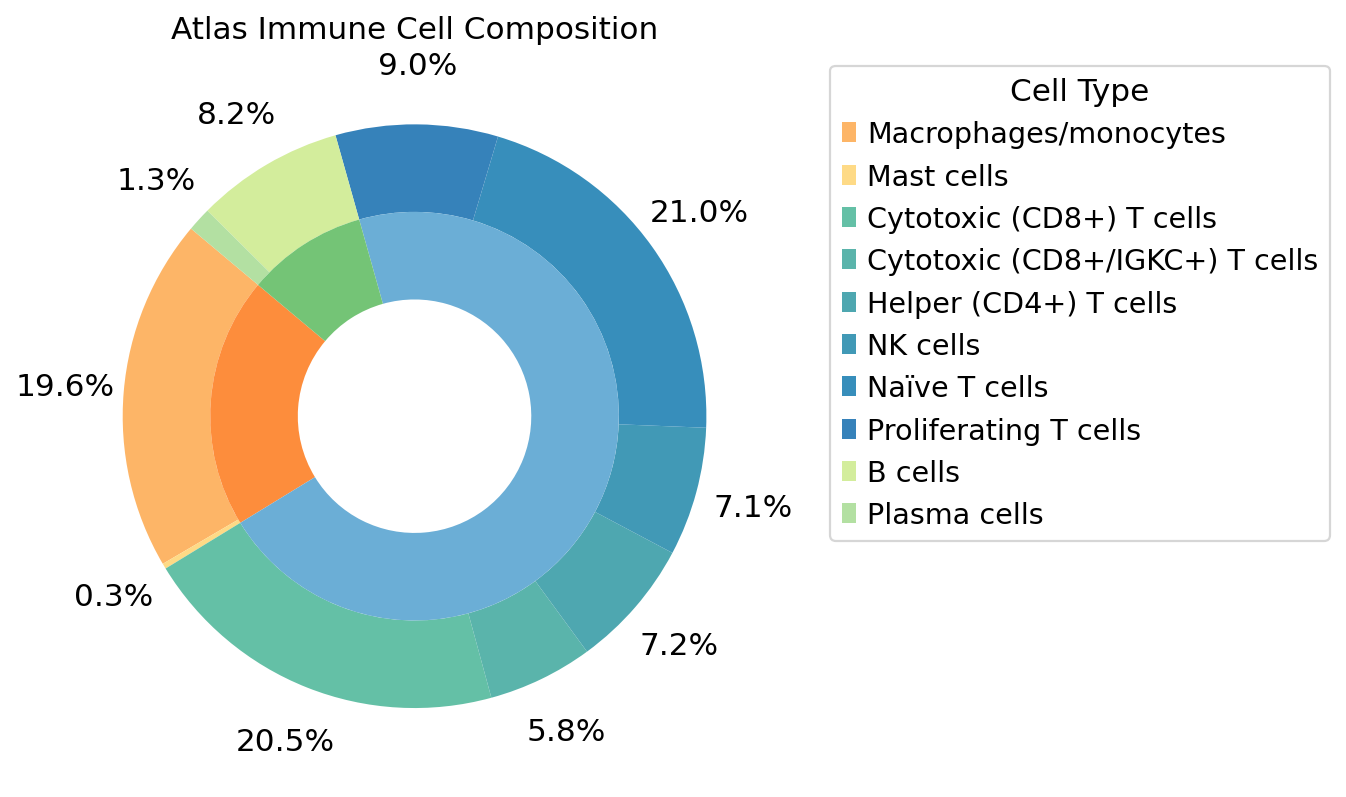

In [26]:
from matplotlib.colors import LinearSegmentedColormap

# Filter the adata.obs DataFrame to include only immune cell types
immune_cells = adata.obs[adata.obs['annotations_final'].isin(immune_types)]

# Count the number of each immune cell type
immune_cell_counts = immune_cells['annotations_final'].value_counts()
# Drop non immune types
immune_cell_counts = immune_cell_counts[immune_cell_counts!=0]

# Reindex so groups are together
immune_cell_counts = immune_cell_counts.reindex(sorted_cell_types)

# Calculate the percentage of each immune cell type
percentages = (immune_cell_counts / immune_cell_counts.sum()) * 100

# Getting correct colors
# immune_type_indices = [i for i, value in enumerate(all_cells) if value in immune_types]
# colors = []
# for i in immune_type_indices:
#     colors.append(color_list[i])

# Get percentages for each group
group_percentages = (cell_group_counts / immune_cell_counts.sum()) * 100

outer_cmap = plt.colormaps["Spectral"]
inner_cmap = plt.colormaps["tab20c"]

outer_colors = outer_cmap([80, 99, 205, 210, 216, 222, 227, 232, 161, 175])
inner_colors = inner_cmap([5, 1, 9])


# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6))
size = 0.3
ax.pie(percentages,
        autopct='%1.1f%%',
        pctdistance = 1.20 ,
        startangle=140,
        colors=outer_colors,
        radius=1,
        #colors=plt.cm.Paired.colors,
        wedgeprops=dict(width=size),
       )
ax.legend(percentages.index, title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(aspect="equal", title='Atlas Immune Cell Composition')

labels = group_percentages.index.tolist()

ax.pie(group_percentages, radius=1-size, colors=inner_colors,
        pctdistance = 1.1 ,
        startangle=140,
        wedgeprops=dict(width=size),
        textprops={'fontsize': 10},
)

plt.savefig('/project/data/gew123/Cell_Annotation/Final_figures/atlas/immune_cells_piechart2.png', bbox_inches='tight')  # Adjust file name and extension as needed
plt.show()

In [323]:
group_percentages.index.tolist()

['Myeloid cells', 'T cells', 'B cells']

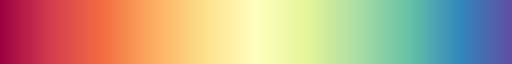

In [206]:
plt.colormaps["Spectral"]

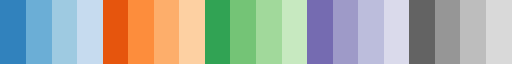

In [216]:
plt.colormaps["tab20c"]

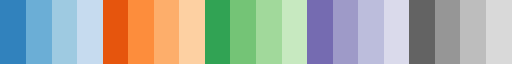

In [225]:
plt.colormaps["tab20c"]